In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (120000, 3)
Test shape: (7600, 3)


In [19]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [21]:
# Combine title + description into one column for later
train_df['text'] = train_df['Title'].astype(str) + " " + train_df['Description'].astype(str)
test_df['text'] = test_df['Title'].astype(str) + " " + test_df['Description'].astype(str)

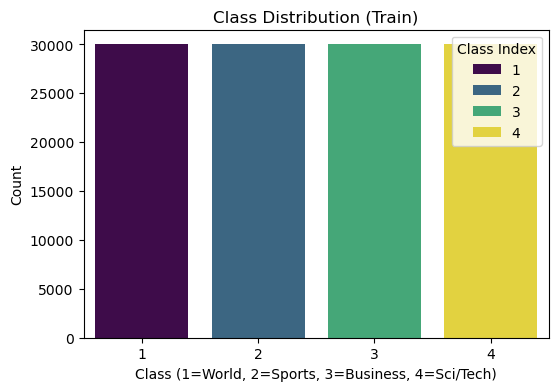

In [29]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Class Index", data=train_df, hue="Class Index", palette="viridis")
plt.title("Class Distribution (Train)")
plt.xlabel("Class (1=World, 2=Sports, 3=Business, 4=Sci/Tech)")
plt.ylabel("Count")
plt.show()

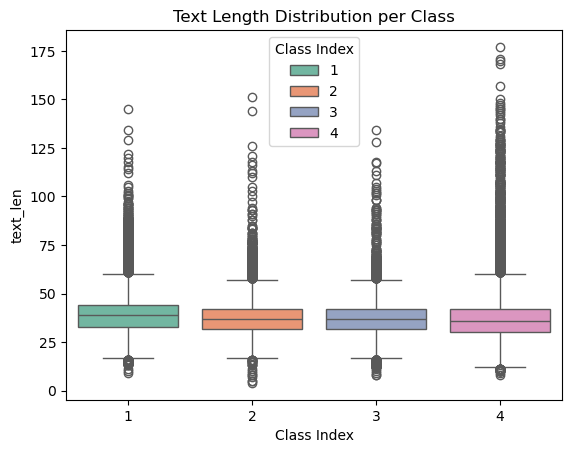


Class 1 Example:
 Explosion Rocks Baghdad Neighborhood BAGHDAD, Iraq, August 24 -- A car bomb exploded near the gate of a US-funded Iraqi television network in Baghdad on Tuesday, killing at least two people and wounding two others, authorities and witnesses said.

Class 2 Example:
 Second Andre win in a row boosts US gold medal hopes Andre Dirrell, fighting with a tattoo of his grandfather #39;s face on his back, assured the United States of at least two boxing medals Wednesday by narrowly beating Cuba #39;s Yordani Despaigne to advance to the Olympic middleweight semifinals.

Class 3 Example:
 US house sales fall in July Sales of non-new houses in the US fell last month but still exceeded analyst forecasts.

Class 4 Example:
 Gartner optimistic about chip numbers But that optimism isn #39;t matched by Infineon, which said that while the market worldwide remains buoyant, the US is a special case and cautioned that growth might not be as strong as it expected.


In [27]:
# Average text length per class
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
sns.boxplot(x="Class Index", y="text_len",  data=train_df, hue="Class Index", palette="Set2")
plt.title("Text Length Distribution per Class")
plt.show()

# Quick look at example texts
for c in sorted(train_df["Class Index"].unique()):
    sample = train_df[train_df["Class Index"]==c].sample(1, random_state=42)
    print(f"\nClass {c} Example:\n", sample['text'].values[0])